# Spectral

This notebook illustrates the spectral clustering of a graph.

In [1]:
import numpy as np
%matplotlib inline

import networkx as nx
import sknetwork as skn

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/types/containers.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [2]:
COLORS = ['r', 'b', 'g', 'c', 'm', 'y']

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.data.karate_club()

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Clustering**

In [4]:
spectral = skn.clustering.SpectralClustering(n_clusters = 2)
labels = spectral.fit_transform(adjacency)

SpectralClustering(n_clusters=2, embedding_dimension=16, l2normalization=True)

In [6]:
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1] [21 13]


**Visualization**

In [7]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


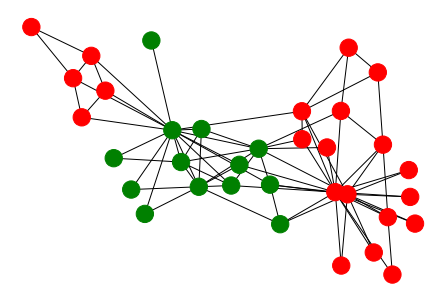

In [8]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph])

**Metrics**

In [9]:
modularity = skn.clustering.modularity

In [10]:
modularity(adjacency, labels)

0.30103550295857995

**Parameters**

In [11]:
spectral = skn.clustering.SpectralClustering(n_components = 10, n_clusters = 4)
labels = spectral.fit_transform(adjacency)
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2 3] [11 14  2  7]


## Directed graphs

**Loading**

In [12]:
adjacency, names = skn.data.painters(return_labels=True)

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Clustering**

In [13]:
# apply spectral clustering for the equivalent bipartite graph
bispectral = skn.clustering.BiSpectralClustering(n_clusters = 3)
bispectral.fit(adjacency)

ValueError: The adjacency is not symmetric.

In [ ]:
labels = bispectral.labels_
print(labels)

**Visualization**

In [ ]:
graph = nx.from_scipy_sparse_matrix(adjacency,create_using=nx.DiGraph())

In [ ]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph], labels=names)

**Metrics**

In [ ]:
modularity(adjacency, labels)

## Bipartite graphs

**Loading**

In [ ]:
biadjacency, movies, actors = skn.data.movie_actor(return_labels=True)
biadjacency

**Clustering**

In [ ]:
bispectral = skn.clustering.BiSpectralClustering(n_clusters = 5)
bispectral.fit(biadjacency)

In [ ]:
labels_row = bispectral.labels_row_
labels_col = bispectral.labels_col_
labels = np.hstack((labels_row, labels_col))
print(labels_row, labels_col)

In [ ]:
# Graph as undirected (ignoring the bipartite structure)
spectral = skn.clustering.SpectralClustering(n_clusters = 5)
adjacency = skn.utils.bipartite2undirected(biadjacency)
spectral.fit(adjacency)

In [ ]:
n1, n2 = biadjacency.shape
labels_row = spectral.labels_[:n1]
labels_col = spectral.labels_[n1:]
labels_undirected = spectral.labels_
print(labels_row, labels_col)

**Visualization**

In [ ]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [ ]:
pos = {i: (0, i) for i in range(n1)} 
pos.update({n1 + i: (2, i) for i in range(n2)})
pos_labels = {i: (0.5, i) for i in range(n1)} 
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [ ]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

In [ ]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[labels[i]] for i in graph], edge_color='grey')
_ = nx.draw_networkx_labels(graph, pos_labels, labels=names)

In [ ]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[labels_undirected[i]] for i in graph], edge_color='grey')
_ = nx.draw_networkx_labels(graph, pos_labels, labels=names)

**Metrics**

In [ ]:
biadjacency

In [ ]:
skn.clustering.bimodularity(biadjacency, labels_row, labels_col)